バルセロナのイベントデータを用いたpasssonar図の描画

# 準備

## 必要なライブラリのインポート

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.projections import get_projection_class
from matplotlib.patches import Arc
from matplotlib import transforms

import statsbomb as sb

## 綺麗なグラフを描画するための関数定義

In [2]:
def draw_graph():
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))

    # 軸の色の設定
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('grey')
    ax.spines['left'].set_color('darkgrey')
    ax.spines['right'].set_color('none')
    ax.tick_params(axis = 'x', colors ='grey')
    ax.tick_params(axis = 'y', colors = 'darkgrey')
    ax.xaxis.label.set_color('grey')

    return fig, ax

In [3]:
plt.rcParams["font.size"] = 12
# 文字カラーを白に
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

In [4]:
color_list = ['#004D98', '#A50044', '#EDBB00', '#DB0030', '#FFED02', '#000000']

## ピッチの描画

In [5]:
twitter_color = '#141d26'
COLOR = 'white'

XMAX, XMIN = 120, 0
YMAX, YMIN = 80, 0

def draw_pitch(title=None, outfilepath=None, colorbar=False):
    fig, ax = plt.subplots(figsize=(10, 8 if colorbar else 7), facecolor=twitter_color)
    
    im = image.imread(os.path.join('..','fig','FC_Barcelona.png'))
    fig.figimage(im, 245, 225 if colorbar else 150, alpha=.3)
    
    fig.patch.set_facecolor('#141d26')
    ax.patch.set_facecolor('#141d26')

    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    ax.plot([0,120], [0, 0], color=COLOR)
    ax.plot([120,120], [0, 80], color=COLOR)
    ax.plot([120,0], [80,80], color=COLOR)
    ax.plot([0, 0], [80, 0], color=COLOR)
    ax.plot([60, 60], [0, 80], color=COLOR)
    ax.plot([0, 0], [36, 44], color=COLOR, linewidth=10)
    ax.plot([120, 120], [36, 44], color=COLOR, linewidth=10)

#         ax.scatter(60, 40, color='black')
    centreCircle = plt.Circle((60, 40), 12, color=COLOR, fill=False)
    ax.add_patch(centreCircle)

    ax.plot([0, 18],  [18, 18], color=COLOR)
    ax.plot([18, 18],  [18, 62], color=COLOR)
    ax.plot([18, 0],  [62, 62], color=COLOR)
    ax.plot([0, 6],  [30, 30], color=COLOR)
    ax.plot([6, 6],  [30, 50], color=COLOR)
    ax.plot([6, 0],  [50, 50], color=COLOR)
#         ax.scatter(12, 40, color='black')

    ax.plot([120, 102],  [18, 18], color=COLOR)
    ax.plot([102, 102],  [18, 62], color=COLOR)
    ax.plot([102, 120],  [62, 62], color=COLOR)
    ax.plot([120, 114],  [30, 30], color=COLOR)
    ax.plot([114, 114],  [30, 50], color=COLOR)
    ax.plot([114, 120],  [50, 50], color=COLOR)
#         ax.scatter(108, 40, color='black')
#     ax.set_ylim(ax.get_ylim()[::-1])

    ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

    if title: ax.set_title(title)
    if outfilepath: plt.savefig(outfilepath, bbox_inches='tight', facecolor=twitter_color)

    return fig, ax

(<Figure size 720x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb361a9358>)

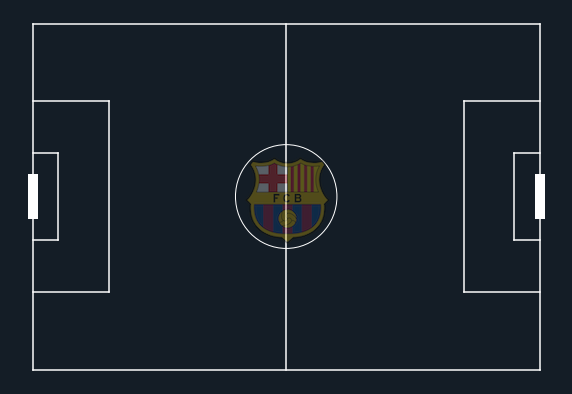

In [6]:
draw_pitch()

## コンペティションの確認

In [6]:
comps = sb.Competitions()
comps.get_dataframe()

,competition_gender,competition_id,competition_name,country_name,match_available,match_updated,season_id,season_name
0,female,37,FA Women's Super League,England,2019-09-10T15:05:58.286,2019-09-10T15:05:58.286,42,2019/2020
1,female,37,FA Women's Super League,England,2019-06-23T15:32:29.914,2019-06-23T15:32:29.914,4,2018/2019
2,male,43,FIFA World Cup,International,2019-06-23T12:38:35.142,2019-06-23T12:38:35.142,3,2018
3,male,11,La Liga,Spain,2019-07-29T20:44:30.861,2019-07-29T20:44:30.861,27,2015/2016
4,male,11,La Liga,Spain,2019-07-30T12:42:05.563,2019-07-30T12:42:05.563,26,2014/2015
5,male,11,La Liga,Spain,2019-07-24T19:44:48.866,2019-07-24T19:44:48.866,25,2013/2014
6,male,11,La Liga,Spain,2019-07-29T17:46:18.935,2019-07-29T17:46:18.935,24,2012/2013
7,male,11,La Liga,Spain,2019-08-27T09:48:17.842,2019-08-27T09:48:17.842,23,2011/2012
8,male,11,La Liga,Spain,2019-08-01T17:44:54.870,2019-08-01T17:44:54.870,22,2010/2011
9,male,11,La Liga,Spain,2019-07-11T07:44:14.533,2019-07-11T07:44:14.533,21,2009/2010


## 試合の確認

In [7]:
comps_df = comps.get_dataframe()
competition_id = comps_df[comps_df.competition_name == 'La Liga'].competition_id.unique()[0]

for i, season_id in enumerate(comps_df[comps_df.competition_id == competition_id].season_id.tolist()):
    matches_df_tmp = sb.Matches(event_id=competition_id, season_id=season_id).get_dataframe()
    if i == 0:
        matches_df = matches_df_tmp
    else:
        matches_df = pd.concat([matches_df, matches_df_tmp])

matches_df.reset_index(inplace=True)
matches_df.head()

,index,away_score,away_team,competition,competition_stage,home_score,home_team,kick_off,last_updated,match_date,match_id,match_status,match_week,metadata,referee,season,stadium
0,0,8,217,11,"{'id': 1, 'name': 'Regular Season'}",0,219,20:00:00.000,2019-07-24T16:57:09.139,2016-04-20,266310,available,34,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun...",27,"{'id': 4658, 'name': 'Estadio Abanca-Riazor'}"
1,1,0,216,11,"{'id': 1, 'name': 'Regular Season'}",6,217,16:00:00.000,2019-07-24T15:24:14.040,2016-03-12,266498,available,29,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 1015, 'name': 'Pedro Pérez'}",27,"{'id': 342, 'name': 'Camp Nou', 'country': {'i..."
2,2,1,213,11,"{'id': 1, 'name': 'Regular Season'}",2,217,20:30:00.000,2019-07-22T14:03:27.572,2016-02-28,265839,available,26,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 217, 'name': 'Santiago Jaime', 'country...",27,"{'id': 342, 'name': 'Camp Nou', 'country': {'i..."
3,3,0,214,11,"{'id': 1, 'name': 'Regular Season'}",5,217,17:00:00.000,2019-07-21T23:53:01.973,2016-05-08,265958,available,37,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 183, 'name': 'Jesús Gil', 'country': {'...",27,"{'id': 342, 'name': 'Camp Nou', 'country': {'i..."
4,4,2,217,11,"{'id': 1, 'name': 'Regular Season'}",2,222,16:00:00.000,2019-07-20T09:50:35.712,2016-03-20,266106,available,30,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 220, 'name': 'José Sánchez', 'country':...",27,"{'id': 361, 'name': 'Estadio de la Cerámica', ..."


In [8]:
home_team_name_list, away_team_name_list = [], []
for idx in matches_df.index.values:
    lineups = sb.Lineups(str(matches_df.loc[idx, 'match_id']))
    lineups_df = lineups.get_dataframe()
    home_team_name = lineups_df[lineups_df.team_id == matches_df.loc[idx, 'home_team']].team_name.values[0]
    away_team_name = lineups_df[lineups_df.team_id == matches_df.loc[idx, 'away_team']].team_name.values[0]
    
    home_team_name_list.append(home_team_name); away_team_name_list.append(away_team_name)
    
matches_df['home_team_name'] = home_team_name_list
matches_df['away_team_name'] = away_team_name_list
matches_df.head()

,index,away_score,away_team,competition,competition_stage,home_score,home_team,kick_off,last_updated,match_date,match_id,match_status,match_week,metadata,referee,season,stadium,home_team_name,away_team_name
0,0,8,217,11,"{'id': 1, 'name': 'Regular Season'}",0,219,20:00:00.000,2019-07-24T16:57:09.139,2016-04-20,266310,available,34,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun...",27,"{'id': 4658, 'name': 'Estadio Abanca-Riazor'}",Deportivo La Coruna,Barcelona
1,1,0,216,11,"{'id': 1, 'name': 'Regular Season'}",6,217,16:00:00.000,2019-07-24T15:24:14.040,2016-03-12,266498,available,29,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 1015, 'name': 'Pedro Pérez'}",27,"{'id': 342, 'name': 'Camp Nou', 'country': {'i...",Barcelona,Getafe
2,2,1,213,11,"{'id': 1, 'name': 'Regular Season'}",2,217,20:30:00.000,2019-07-22T14:03:27.572,2016-02-28,265839,available,26,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 217, 'name': 'Santiago Jaime', 'country...",27,"{'id': 342, 'name': 'Camp Nou', 'country': {'i...",Barcelona,Sevilla
3,3,0,214,11,"{'id': 1, 'name': 'Regular Season'}",5,217,17:00:00.000,2019-07-21T23:53:01.973,2016-05-08,265958,available,37,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 183, 'name': 'Jesús Gil', 'country': {'...",27,"{'id': 342, 'name': 'Camp Nou', 'country': {'i...",Barcelona,Espanyol
4,4,2,217,11,"{'id': 1, 'name': 'Regular Season'}",2,222,16:00:00.000,2019-07-20T09:50:35.712,2016-03-20,266106,available,30,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 220, 'name': 'José Sánchez', 'country':...",27,"{'id': 361, 'name': 'Estadio de la Cerámica', ...",Villarreal,Barcelona


In [10]:
matches_df[(matches_df.home_team_name=='Barcelona')&(matches_df.away_team_name=='Real Madrid')]

,index,away_score,away_team,competition,competition_stage,home_score,home_team,kick_off,last_updated,match_date,match_id,match_status,match_week,metadata,referee,season,stadium,home_team_name,away_team_name
18,18,2,220,11,"{'id': 1, 'name': 'Regular Season'}",1,217,20:30:00.000,2019-07-24T14:03:42.795,2016-04-02,267533,available,31,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 208, 'name': 'Alejandro Hernández', 'co...",27,"{'id': 342, 'name': 'Camp Nou', 'country': {'i...",Barcelona,Real Madrid
35,2,1,220,11,"{'id': 1, 'name': 'Regular Season'}",2,217,21:00:00.000,2019-07-24T16:50:58.323,2015-03-22,267183,available,28,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 180, 'name': 'Antonio Mateu', 'country'...",26,"{'id': 342, 'name': 'Camp Nou', 'country': {'i...",Barcelona,Real Madrid
79,8,1,220,11,"{'id': 1, 'name': 'Regular Season'}",2,217,18:00:00.000,2019-07-16T08:56:55.883,2013-10-26,70293,available,10,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 221, 'name': 'Alberto Undiano', 'countr...",25,"{'id': 342, 'name': 'Camp Nou', 'country': {'i...",Barcelona,Real Madrid
118,16,2,220,11,"{'id': 1, 'name': 'Regular Season'}",2,217,19:50:00.000,2019-07-17T09:46:17.114,2012-10-07,70300,available,7,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 1012, 'name': 'Carlos Delgado'}",24,"{'id': 342, 'name': 'Camp Nou', 'country': {'i...",Barcelona,Real Madrid
149,15,2,220,11,"{'id': 1, 'name': 'Regular Season'}",1,217,20:00:00.000,2019-07-10T21:48:51.003,2012-04-21,69324,available,35,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 221, 'name': 'Alberto Undiano', 'countr...",23,"{'id': 342, 'name': 'Camp Nou', 'country': {'i...",Barcelona,Real Madrid
196,25,0,220,11,"{'id': 1, 'name': 'Regular Season'}",5,217,21:00:00.000,2019-07-06T18:52:23.765275,2010-11-29,69299,available,13,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 999, 'name': 'Iturralde'}",22,"{'id': 342, 'name': 'Camp Nou', 'country': {'i...",Barcelona,Real Madrid
232,28,0,220,11,"{'id': 1, 'name': 'Regular Season'}",1,217,19:00:00.000,2019-07-03T22:42:00.137,2009-11-29,69262,available,12,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 221, 'name': 'Alberto Undiano', 'countr...",21,"{'id': 342, 'name': 'Camp Nou', 'country': {'i...",Barcelona,Real Madrid
251,12,0,220,11,"{'id': 1, 'name': 'Regular Season'}",2,217,22:00:00.000,2019-07-06T12:37:07.778,2008-12-13,69225,available,15,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 1011, 'name': 'Luis Medina Cantalejo'}",41,"{'id': 342, 'name': 'Camp Nou', 'country': {'i...",Barcelona,Real Madrid
308,10,3,220,11,"{'id': 1, 'name': 'Regular Season'}",3,217,22:00:00.000,2019-07-01T10:42:43.160,2007-03-10,68335,available,26,"{'data_version': '1.1.0', 'shot_fidelity_versi...","{'id': 221, 'name': 'Alberto Undiano', 'countr...",39,"{'id': 342, 'name': 'Camp Nou', 'country': {'i...",Barcelona,Real Madrid


## データの収集

In [9]:
from tqdm import tqdm
from tqdm._tqdm_notebook import tqdm_notebook 

for i, match_id in tqdm(enumerate(matches_df.match_id)):
    try:
        events = sb.Events(str(match_id))
        event_df_tmp = events.get_dataframe(event_type='pass')
        event_df_tmp['match_id'] = match_id

        if i == 0:
            event_df = event_df_tmp
        else:
            event_df = pd.concat([event_df, event_df_tmp])
    except:
        print(match_id)

348it [11:21,  2.67s/it]


In [13]:
event_df = pd.merge(event_df, matches_df[['match_id', 'season']], on='match_id')

In [14]:
event_df = pd.merge(event_df, comps.get_dataframe()[['season_id', 'season_name']], left_on='season', right_on='season_id')

In [15]:
season_list = np.sort(event_df.season_name.unique()).tolist()
season_list_list = [season_list[:3], season_list[3:6], season_list[6:9], [season_list[9]], season_list[10:]]

# パスソナー図の描画

## 1試合のみ

### 集計

In [11]:
x_bins = np.linspace(XMIN, XMAX, 6+1)
y_bins = np.linspace(YMIN, YMAX, 5+1)
angle_bins = np.linspace(-np.pi, np.pi, 12)

In [21]:
# match_id = 69299

In [185]:
x_cut = pd.cut(event_df['start_location_x'], x_bins, right = True)
y_cut = pd.cut(event_df['start_location_y'], y_bins, right = True)
angle_cut = pd.cut(event_df['angle'], angle_bins, right = True)

summary = event_df.groupby([x_cut, y_cut, angle_cut]).agg({'event_type':'count', 'length':'mean'}).reset_index()

### 描画

In [186]:
data = matches_df[matches_df.match_id==match_id][['home_score', 'away_score', 'match_week', 'match_date', 'home_team_name', 'away_team_name']]
season = comps_df[comps_df.season_id==matches_df[matches_df.match_id==match_id]['season'].values[0]]

In [187]:
title = f'{data.home_team_name.values[0]} {data.home_score.values[0]}-{data.away_score.values[0]} {data.away_team_name.values[0]} on {data.match_date.values[0]} via statsbomb'

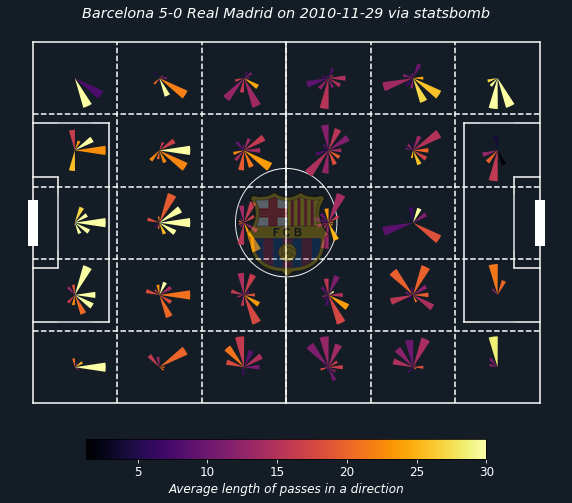

In [188]:
import matplotlib
fig, ax = draw_pitch(colorbar=True)

cmap = plt.get_cmap('inferno')

norm = plt.Normalize(summary["length"].min(), 30) ##Change 30 to whatever you want the upper bound for the length of the pass to be in the colormap. Change to "team["pass.length"].max()" for the maximum
ar = np.array(summary["length"])
sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, orientation="horizontal", fraction=0.046, pad=0.04)
cbar.ax.set_xlabel("Average length of passes in a direction", fontstyle = "italic")
# cbar.ax.xaxis.set_tick_params(color = "xkcd:salmon")
# plt.setp(plt.getp(cbar.ax.axes, "xticklabels"), color = "xkcd:salmon")

# plot lines
for i in range(1, 5):
    ax.plot([XMIN, XMAX], [YMAX*(i/5), YMAX*(i/5)], color='white', linestyle='--')
    
for i in range(1, 6):
    ax.plot([XMAX*(i/6), XMAX*(i/6)], [YMIN, YMAX], color='white', linestyle='--')
    
# plot pass sonar
for x_ in summary.start_location_x.unique().tolist():
    for y_ in summary.start_location_y.unique().tolist():
        x, y = x_.mid, y_.mid
        ax_sub = inset_axes(ax, width=0.9, height=0.9, loc=10, 
                           bbox_to_anchor=(x, y),
                            bbox_transform=ax.transData, 
                            borderpad=0.0, axes_class=get_projection_class("polar"))
        length = summary[(summary.start_location_x==x_)&(summary.start_location_y==y_)].length.values
        radii = summary[(summary.start_location_x==x_)&(summary.start_location_y==y_)].event_type.values
        cm = cmap(norm(length))
        angles = [angle.mid for angle in summary[(summary.start_location_x==x_)&(summary.start_location_y==y_)].angle]
        bars = ax_sub.bar(angles, radii, width=0.3, bottom=0.0)
        ax_sub.set_xticklabels([]); ax_sub.set_yticks([])
        ax_sub.yaxis.grid(False); ax_sub.xaxis.grid(False)
        ax_sub.spines['polar'].set_visible(False)
        ax_sub.patch.set_facecolor(twitter_color)
        ax_sub.patch.set_alpha(0.1)
        
        cm = cmap(norm(length))
        for r, bar in zip(cm, bars):
            bar.set_facecolor(r)
            
    ax.set_title(title, fontstyle='italic')

## シーズンごと

In [30]:
season_df = pd.merge(matches_df.groupby('season').size().reset_index(), comps.get_dataframe()[['season_id', 'season_name']], left_on='season', right_on='season_id').sort_values('season_name').drop('season', axis=1).drop('season_id', axis=1)

In [34]:
season_df.rename({0:'Number of games'}, axis=1)

,Number of games,season_name
7,7,2004/2005
8,17,2005/2006
9,26,2006/2007
10,28,2007/2008
11,31,2008/2009
0,35,2009/2010
1,33,2010/2011
2,37,2011/2012
3,32,2012/2013
4,31,2013/2014


In [28]:
event_df.groupby('season_name').size().reset_index()

,season_name,0
0,2004/2005,6253
1,2005/2006,15492
2,2006/2007,25198
3,2007/2008,27425
4,2008/2009,29324
5,2009/2010,35445
6,2010/2011,36739
7,2011/2012,40496
8,2012/2013,37049
9,2013/2014,32626


In [16]:
x_cut = pd.cut(event_df['start_location_x'], x_bins, right = True)
y_cut = pd.cut(event_df['start_location_y'], y_bins, right = True)
angle_cut = pd.cut(event_df['angle'], angle_bins, right = True)

summary_all = event_df.groupby(['season_name',x_cut, y_cut, angle_cut]).agg({'event_type':'count', 'length':'mean'}).reset_index()

# summary_all.event_type = summary_all.event_type / summary_all.event_type.max()

/Users/yamamuros83/.pyenv/versions/anaconda3-5.3.1/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


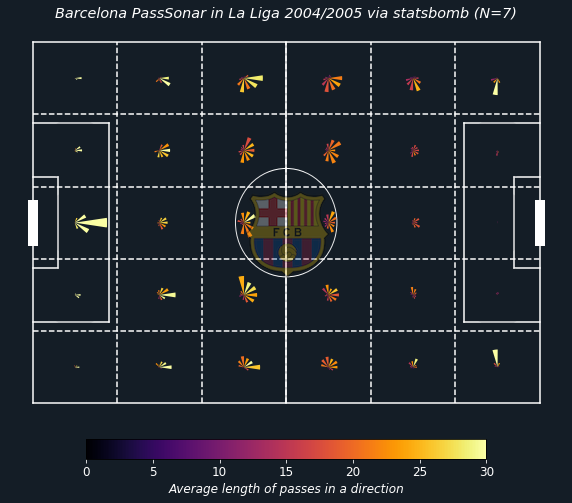

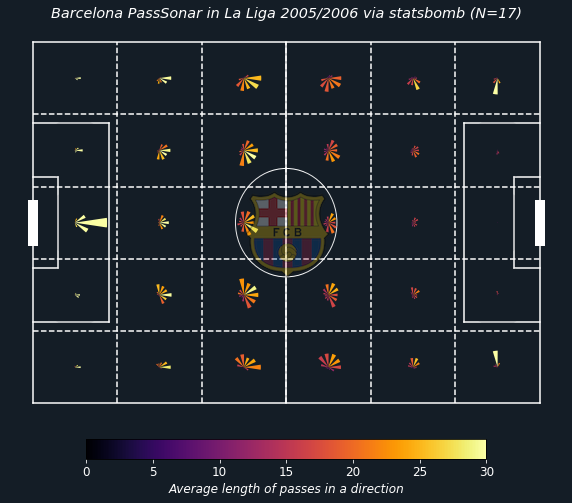

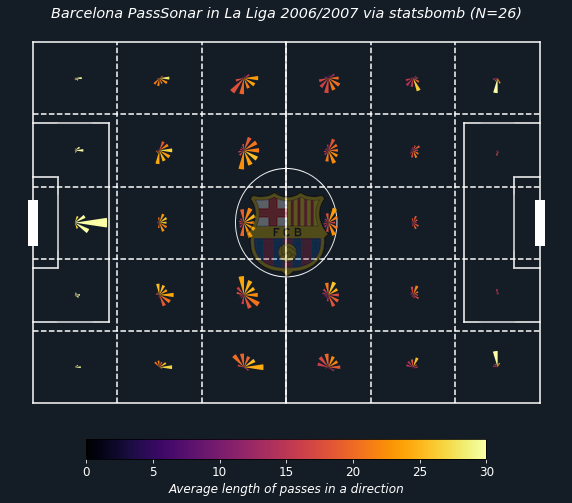

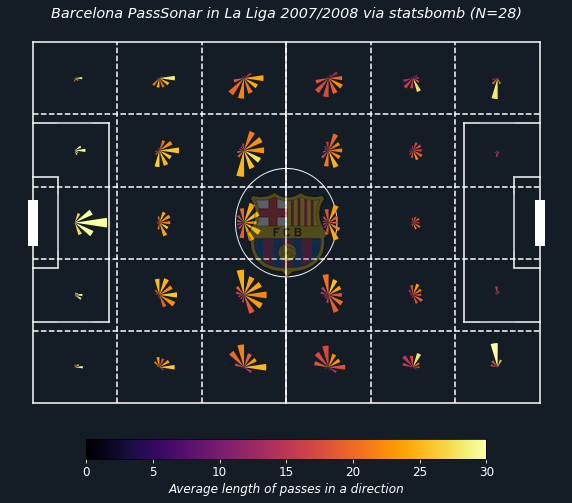

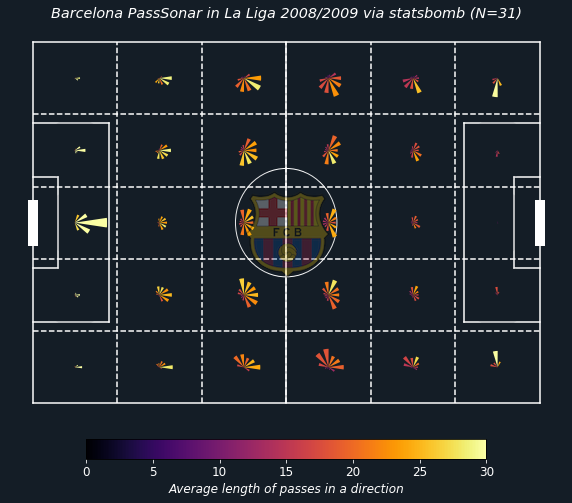

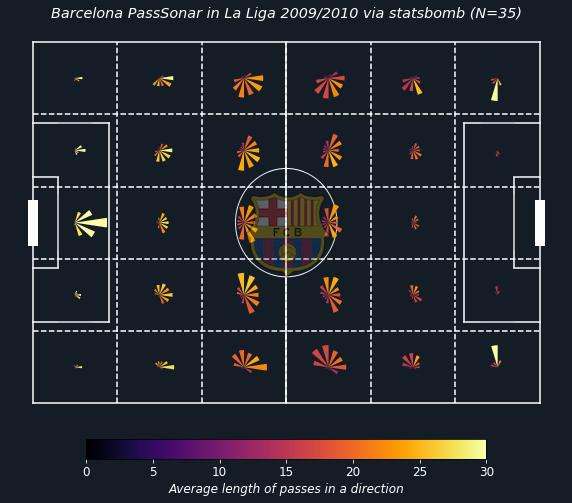

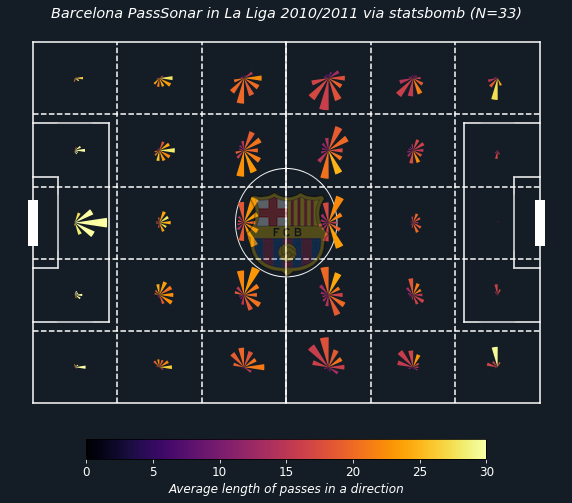

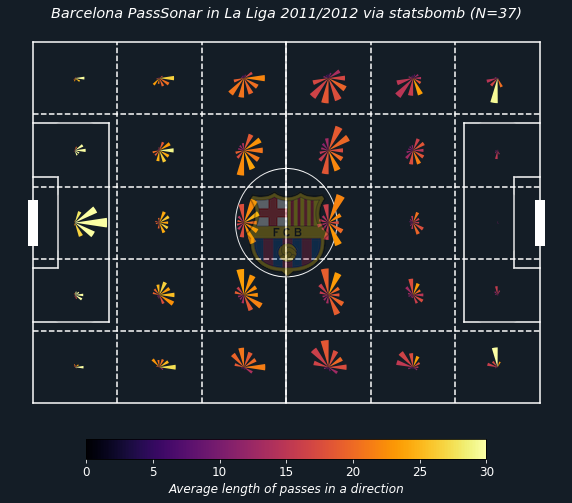

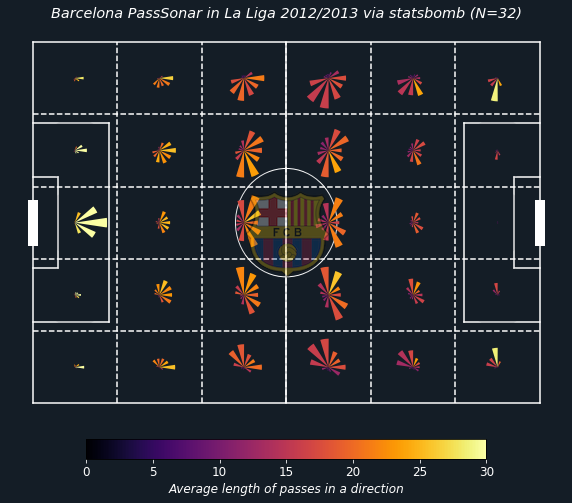

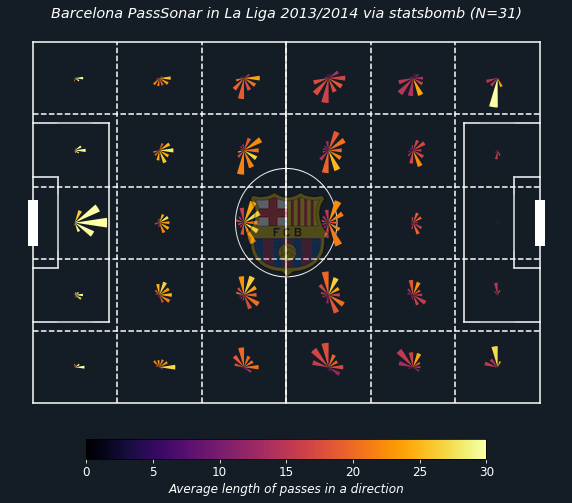

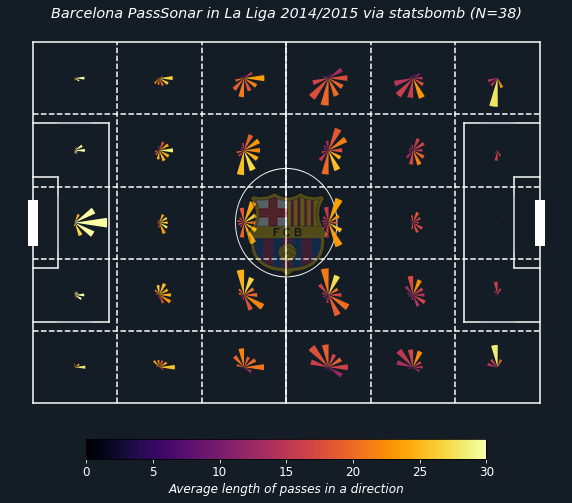

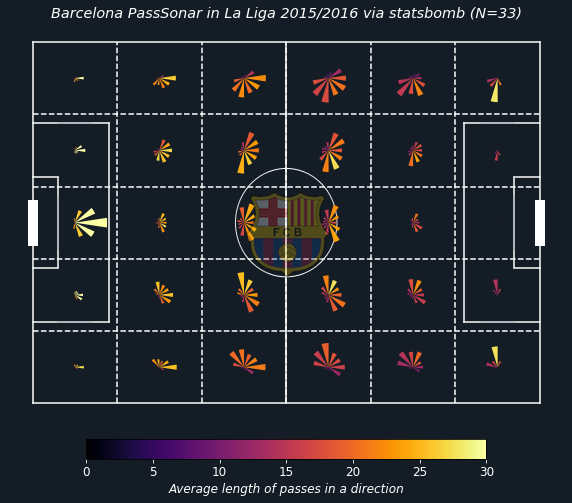

In [37]:
import matplotlib
cmap = plt.get_cmap('inferno')

def convert_season_name(season_name):
    return '-'.join([season_name_tmp[2:] for season_name_tmp in season_name.split('/')])

for season_name in summary_all.season_name.unique().tolist():
    # 集計
    number_of_games = season_df.loc[season_df.season_name==season_name, 0].values[0]
    summary = summary_all[summary_all.season_name==season_name]
    summary.event_type = summary.event_type / number_of_games
    fig, ax = draw_pitch(colorbar=True)

    norm = plt.Normalize(event_df["length"].min(), 30) ##Change 30 to whatever you want the upper bound for the length of the pass to be in the colormap. Change to "team["pass.length"].max()" for the maximum
    ar = np.array(summary["length"])
    sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, orientation="horizontal", fraction=0.046, pad=0.04)
    cbar.ax.set_xlabel("Average length of passes in a direction", fontstyle = "italic")

    # plot lines
    for i in range(1, 5):
        ax.plot([XMIN, XMAX], [YMAX*(i/5), YMAX*(i/5)], color='white', linestyle='--')

    for i in range(1, 6):
        ax.plot([XMAX*(i/6), XMAX*(i/6)], [YMIN, YMAX], color='white', linestyle='--')

    # plot pass sonar
    for x_ in summary.start_location_x.unique().tolist():
        for y_ in summary.start_location_y.unique().tolist():
            x, y = x_.mid, y_.mid
            ax_sub = inset_axes(ax, width=0.9, height=0.9, loc=10, 
                               bbox_to_anchor=(x, y),
                                bbox_transform=ax.transData, 
                                borderpad=0.0, axes_class=get_projection_class("polar"))
            length = summary[(summary.start_location_x==x_)&(summary.start_location_y==y_)].length.values
            radii = summary[(summary.start_location_x==x_)&(summary.start_location_y==y_)].event_type.values
            cm = cmap(norm(length))
            angles = [angle.mid for angle in summary[(summary.start_location_x==x_)&(summary.start_location_y==y_)].angle]
            bars = ax_sub.bar(angles, radii, width=0.3, bottom=0.0)
            ax_sub.set_xticklabels([]); ax_sub.set_yticks([])
            ax_sub.set_ylim([0, summary.event_type.max()])
            ax_sub.yaxis.grid(True)
            ax_sub.yaxis.grid(False); ax_sub.xaxis.grid(False)
            ax_sub.spines['polar'].set_visible(False)
            ax_sub.patch.set_facecolor(twitter_color)
            ax_sub.patch.set_alpha(0.1)

            cm = cmap(norm(length))
            for r, bar in zip(cm, bars):
                bar.set_facecolor(r)

    title = f'Barcelona PassSonar in La Liga {season_name} via statsbomb (N={number_of_games})'
    ax.set_title(title, fontstyle='italic')
    
    plt.savefig(os.path.join('..','fig',f'passsonar_{convert_season_name(season_name)}.png'), bbox_inches='tight', facecolor=twitter_color)
    

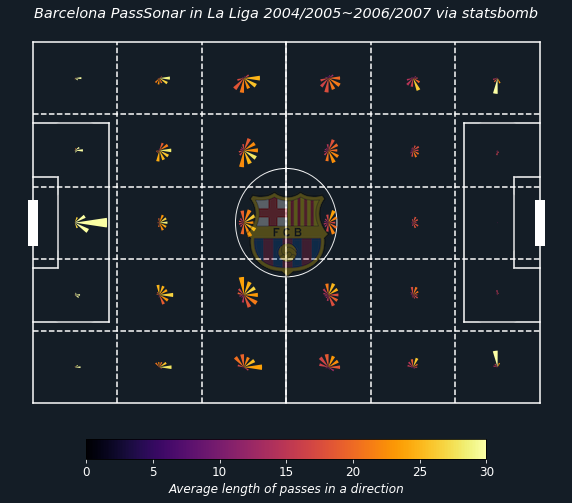

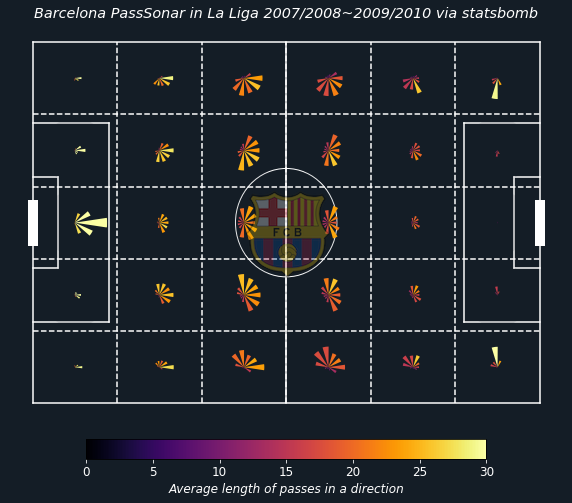

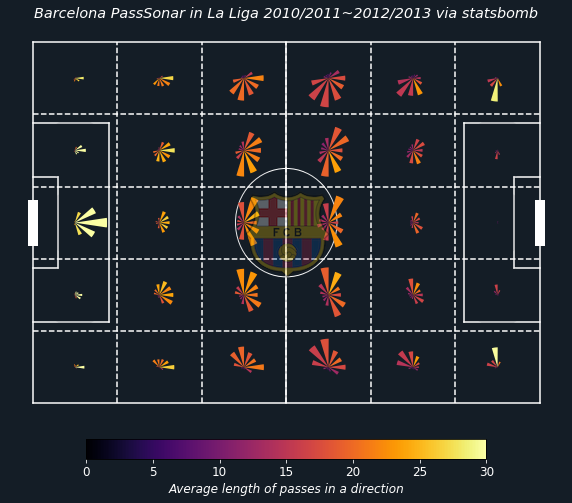

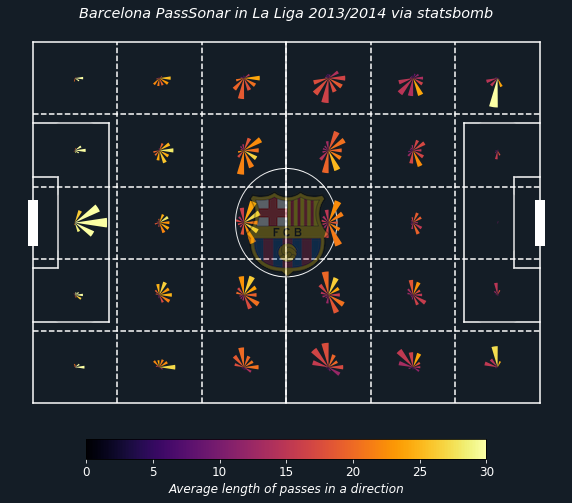

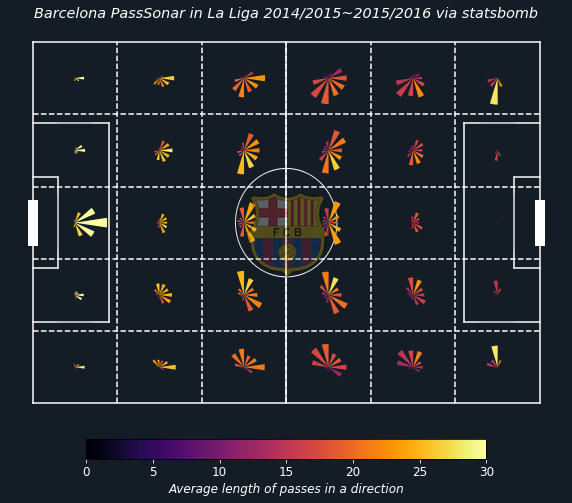

In [22]:
import matplotlib
cmap = plt.get_cmap('inferno')

def convert_season_name(season_name):
    return '-'.join([season_name_tmp[2:] for season_name_tmp in season_name.split('/')])

for season_list in season_list_list:
    # 集計
    x_cut = pd.cut(event_df[event_df.season_name.isin(season_list)]['start_location_x'], x_bins, right = True)
    y_cut = pd.cut(event_df[event_df.season_name.isin(season_list)]['start_location_y'], y_bins, right = True)
    angle_cut = pd.cut(event_df[event_df.season_name.isin(season_list)]['angle'], angle_bins, right = True)
    summary = event_df[event_df.season_name.isin(season_list)].groupby([x_cut, y_cut, angle_cut]).agg({'event_type':'count', 'length':'mean'}).reset_index()
    fig, ax = draw_pitch(colorbar=True)

    norm = plt.Normalize(event_df["length"].min(), 30) ##Change 30 to whatever you want the upper bound for the length of the pass to be in the colormap. Change to "team["pass.length"].max()" for the maximum
    ar = np.array(summary["length"])
    sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, orientation="horizontal", fraction=0.046, pad=0.04)
    cbar.ax.set_xlabel("Average length of passes in a direction", fontstyle = "italic")

    # plot lines
    for i in range(1, 5):
        ax.plot([XMIN, XMAX], [YMAX*(i/5), YMAX*(i/5)], color='white', linestyle='--')

    for i in range(1, 6):
        ax.plot([XMAX*(i/6), XMAX*(i/6)], [YMIN, YMAX], color='white', linestyle='--')

    # plot pass sonar
    for x_ in summary.start_location_x.unique().tolist():
        for y_ in summary.start_location_y.unique().tolist():
            x, y = x_.mid, y_.mid
            ax_sub = inset_axes(ax, width=0.9, height=0.9, loc=10, 
                               bbox_to_anchor=(x, y),
                                bbox_transform=ax.transData, 
                                borderpad=0.0, axes_class=get_projection_class("polar"))
            length = summary[(summary.start_location_x==x_)&(summary.start_location_y==y_)].length.values
            radii = summary[(summary.start_location_x==x_)&(summary.start_location_y==y_)].event_type.values
            cm = cmap(norm(length))
            angles = [angle.mid for angle in summary[(summary.start_location_x==x_)&(summary.start_location_y==y_)].angle]
            bars = ax_sub.bar(angles, radii, width=0.3, bottom=0.0)
            ax_sub.set_xticklabels([]); ax_sub.set_yticks([])
            ax_sub.set_ylim([0, summary.event_type.max()])
            ax_sub.yaxis.grid(False); ax_sub.xaxis.grid(False)
            ax_sub.spines['polar'].set_visible(False)
            ax_sub.patch.set_facecolor(twitter_color)
            ax_sub.patch.set_alpha(0.1)

            cm = cmap(norm(length))
            for r, bar in zip(cm, bars):
                bar.set_facecolor(r)

    
    title = f'Barcelona PassSonar in La Liga {season_list[0]}~{season_list[-1]} via statsbomb' if len(season_list)!=1 else f'Barcelona PassSonar in La Liga {season_list[0]} via statsbomb'
    ax.set_title(title, fontstyle='italic')
    
    plt.savefig(os.path.join('..','fig',f'passsonar_{convert_season_name(season_list[0])}~{convert_season_name(season_list[-1])}.png' if len(season_list)!=1 else f'passsonar_{convert_season_name(season_list[0])}.png'), bbox_inches='tight', facecolor=twitter_color)
    